In [1]:
# !pip uninstall -y skforecast
# !pip install git+https://github.com/JoaquinAmatRodrigo/skforecast#master --upgrade

In [1]:
# Libraries
# ==============================================================================
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/ximo/Documents/GitHub/skforecast')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
%config Completer.use_jedi = False

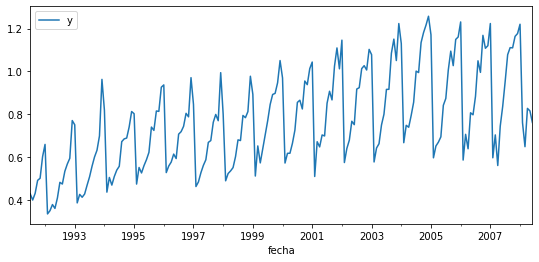

In [2]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',')

# Data preprocessing
# ==============================================================================
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y/%m/%d')
data = data.set_index('fecha')
data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data.plot(ax=ax, label='y')
ax.legend();

In [19]:
forecaster = ForecasterAutoregMultiOutput(
                    regressor = LinearRegression(),
                    steps     = 36,
                    lags      = 10
                )

x_train, y_train = forecaster.create_train_X_y(y=data_train)
y_train

,y_step_0,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5,y_step_6,y_step_7,y_step_8,y_step_9,...,y_step_26,y_step_27,y_step_28,y_step_29,y_step_30,y_step_31,y_step_32,y_step_33,y_step_34,y_step_35
fecha,,,,,,,,,,,,,,,,,,,,,
1995-04-01,0.361801,0.410534,0.483389,0.475463,0.534761,0.568606,0.595223,0.771258,0.751503,0.387554,...,0.558119,0.672852,0.685897,0.689692,0.741304,0.813308,0.803113,0.475258,0.552572,0.527108
1995-05-01,0.410534,0.483389,0.475463,0.534761,0.568606,0.595223,0.771258,0.751503,0.387554,0.427283,...,0.672852,0.685897,0.689692,0.741304,0.813308,0.803113,0.475258,0.552572,0.527108,0.561250
1995-06-01,0.483389,0.475463,0.534761,0.568606,0.595223,0.771258,0.751503,0.387554,0.427283,0.413890,...,0.685897,0.689692,0.741304,0.813308,0.803113,0.475258,0.552572,0.527108,0.561250,0.588978
1995-07-01,0.475463,0.534761,0.568606,0.595223,0.771258,0.751503,0.387554,0.427283,0.413890,0.428859,...,0.689692,0.741304,0.813308,0.803113,0.475258,0.552572,0.527108,0.561250,0.588978,0.623134
1995-08-01,0.534761,0.568606,0.595223,0.771258,0.751503,0.387554,0.427283,0.413890,0.428859,0.470126,...,0.741304,0.813308,0.803113,0.475258,0.552572,0.527108,0.561250,0.588978,0.623134,0.740837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-01,0.641165,0.679862,0.767938,0.752096,0.918064,0.924368,1.013198,1.026976,1.006796,1.102776,...,0.795129,0.856803,1.001593,0.994864,1.134432,1.181011,1.216037,1.257238,1.170690,0.597639
2005-03-01,0.679862,0.767938,0.752096,0.918064,0.924368,1.013198,1.026976,1.006796,1.102776,1.078145,...,0.856803,1.001593,0.994864,1.134432,1.181011,1.216037,1.257238,1.170690,0.597639,0.652590
2005-04-01,0.767938,0.752096,0.918064,0.924368,1.013198,1.026976,1.006796,1.102776,1.078145,0.578296,...,1.001593,0.994864,1.134432,1.181011,1.216037,1.257238,1.170690,0.597639,0.652590,0.670505


In [44]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregMultiOutput(
                    regressor = LinearRegression(),
                    steps     = 36,
                    lags      = 10
                )

forecaster.fit(data_train)
forecaster

<class 'skforecast.ForecasterAutoregMultiOutput.ForecasterAutoregMultiOutput'> 
Regressor: LinearRegression() 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Window size: 10 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> 
Training index frequancy: MS 
Regressor parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False} 

Test error (mse): 0.009702423954899465


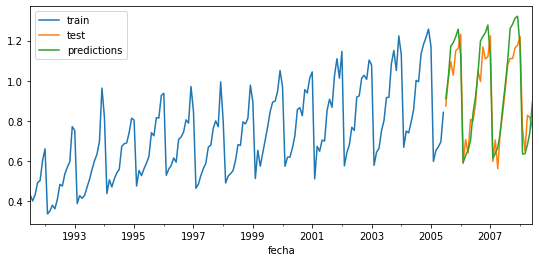

In [45]:
# Predict
# ==============================================================================
predictions = forecaster.predict()


# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [46]:
# Grid search hiperparameters and lags
# ==============================================================================
forecaster = ForecasterAutoregMultiOutput(
                    regressor = RandomForestRegressor(random_state=123),
                    steps     = 36,
                    lags      = 3
                )
forecaster.fit(data_train)
# Regressor hiperparameters
param_grid = {'n_estimators': [10, 50],
              'max_depth': [5, 10]}

# lags used as predictors
lags_grid = [3, 10, [1,2,3,20]]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = data_train,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = forecaster.steps,
                        metric      = 'mean_squared_error',
                        method      = 'backtesting',
                        initial_train_size    = None,
                        allow_incomplete_fold = False,
                        return_best = True,
                        verbose     = True
                    )

# Results grid search
# ==============================================================================
results_grid

root       INFO  Number of models compared: 12
loop param_grid:   0%|                                    | 0/4 [00:00<?, ?it/s]root       WARNING Altough no initial train is done, the first 3 observations are needed to create the initial predictors. Therefore, no predictions are calculated for them.

loop lags_grid:   0%|                                     | 0/3 [00:00<?, ?it/s]

Number of observations used for training or as initial window: 3
Number of observations used for backtesting: 165
    Number of folds: 5
    Number of steps per fold: 36
    Last fold only includes 21 observations


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
forecaster

Number of observations used for training or as initial window: 95
Number of observations used for backtesting: 109
    Number of folds: 4
    Number of steps per fold: 36
    Last fold only includes 1 observations
[0.03260179]


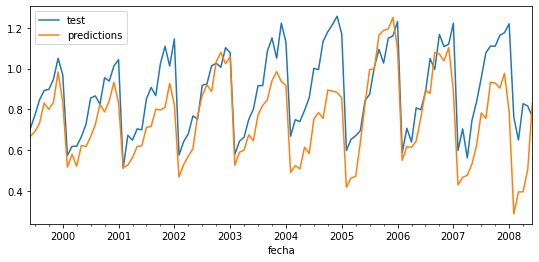

In [47]:
# Backtest 
# ==============================================================================
n_test = 36*3 + 1
data_train = data[:-n_test]
data_test  = data[-n_test:]

forecaster = ForecasterAutoregMultiOutput(
                    regressor = LinearRegression(),
                    steps     = 36,
                    lags      = 15
             )

metrica, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = data,
                            initial_train_size = len(data_train),
                            steps      = forecaster.steps,
                            metric     = 'mean_squared_error',
                            verbose    = True
                       )

print(metrica)

# Se añade el índice temporal a las predicciones
predicciones_backtest = pd.Series(data=predictions, index=data_test[:len(predictions)].index)

# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
#data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predicciones_backtest.plot(ax=ax, label='predictions')
ax.legend();

In [48]:
# Feature importance
# ==============================================================================
for step in range(1, forecaster.steps):
    print(f"\n Model step: {step}")
    print(forecaster.get_coef(step = step))


 Model step: 1
[ 0.41027188 -0.14674613  0.09226529 -0.06392558  0.10515625 -0.18531542
  0.07999999 -0.0351197   0.01481861 -0.04322598  0.08527348  0.89015049
 -0.37628168  0.124808   -0.08830264]

 Model step: 2
[ 0.0056728   0.13340405 -0.23853055  0.0135521  -0.09212447  0.01220143
 -0.04157595  0.04695597 -0.06102362  0.06829383  0.9325276  -0.01704699
 -0.00939653 -0.15842891  0.22399086]

 Model step: 3
[ 0.12804067 -0.25166188  0.01728755 -0.05074347 -0.03043504 -0.04790344
  0.04931905 -0.07082373  0.07370185  0.92184399 -0.01634428 -0.00690652
 -0.16008374  0.24659014 -0.01953951]

 Model step: 4
[-0.18221725 -0.00715881 -0.04176313 -0.02903443 -0.03507585  0.0129802
 -0.01335253  0.02212724  0.93878284 -0.02952668  0.01815526 -0.0528953
  0.19973578 -0.0128625   0.00770712]

 Model step: 5
[-9.14330930e-02  2.79653893e-02 -1.77280048e-01  2.06396215e-05
 -3.54220274e-02  9.84134459e-03  1.68818644e-02  9.29791105e-01
 -2.98388681e-02  6.83498787e-03 -5.40478794e-02  2.5675

## Autoreg + 1 exogenous predictor
<br>

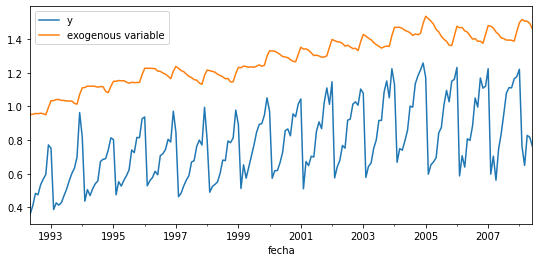

In [49]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',')

# Data preprocessing
# ==============================================================================
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y/%m/%d')
data = data.set_index('fecha')
data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Exogenous variable
# ==============================================================================
data_exog = data.rolling(window=10, closed='right').mean() + 0.5
data_exog = data_exog[10:]
data = data[10:]

fig, ax=plt.subplots(figsize=(9, 4))
data.plot(ax=ax, label='y')
data_exog.plot(ax=ax, label='exogenous variable')
ax.legend();


# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

data_exog_train = data_exog[:-steps]
data_exog_test  = data_exog[-steps:]

In [61]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregMultiOutput(
                    regressor = Ridge(),
                    steps     = 36,
                    lags      = 10
                )

forecaster.fit(y=data_train, exog=data_exog_train)
forecaster

<class 'skforecast.ForecasterAutoregMultiOutput.ForecasterAutoregMultiOutput'> 
Regressor: Ridge() 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Window size: 10 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.series.Series'> 
Exogenous variables names: None 
Training range: [Timestamp('1992-05-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> 
Training index frequancy: MS 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001} 

Test error (mse): 0.008071341212160006


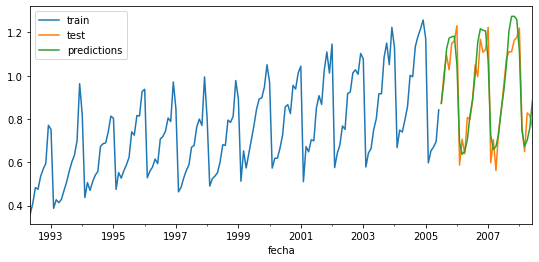

In [62]:
# Predict
# ==============================================================================
predictions = forecaster.predict(
                    exog     = data_exog_test
              )

# Add datetime index to predictions
predictions = pd.DataFrame(data=predictions, index=data_test.index)

# Predict
# ==============================================================================
predictions = forecaster.predict(exog = data_exog_test)
# Add datetime index to predictions
predictions = pd.Series(data=predictions, index=data_test.index)

# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

#0.00807134121216

In [30]:
# Feature importance
# ==============================================================================
for step in range(1, forecaster.steps):
    print(f"\n Model step: {step}")
    print(forecaster.get_coef(step = step))


 Model step: 1
[ 0.39617818  0.06259433  0.0160303  -0.06345751 -0.06637312 -0.05607901
 -0.05524681 -0.01467135  0.05534023  0.1952805   0.21288003]

 Model step: 2
[ 0.16791411  0.04228042 -0.04713965 -0.07098066 -0.07311102 -0.05787811
 -0.05607599  0.03367757  0.06824319  0.39853033  0.26842707]

 Model step: 3
[ 0.03982488 -0.02212498 -0.0386757  -0.03899902 -0.04715761 -0.01872319
 -0.00189792  0.04341716  0.15735046  0.59694355  0.14264852]

 Model step: 4
[-0.02078167 -0.03346347 -0.03166579 -0.03977318 -0.0140786   0.00288662
  0.03420334  0.15061083  0.54612083  0.13033652  0.11271208]

 Model step: 5
[-0.03792479 -0.03517703 -0.04179624 -0.01466614  0.00985731  0.02478454
  0.15347257  0.54299255  0.13905396 -0.03217205  0.11381887]

 Model step: 6
[-0.04580747 -0.04062282 -0.01804242  0.00920478  0.01711427  0.16357021
  0.54609466  0.1448006  -0.02285627 -0.03256472  0.11081872]

 Model step: 7
[-0.05287595 -0.01839052  0.00559173  0.01606558  0.1555033   0.55664096
  0.1

2021-07-26 22:37:14,149 root       WARNING Backtesting `ForecasterAutoregMultiOutput` only allow completed folds. Last 1 observations are excluded.


[0.041978]


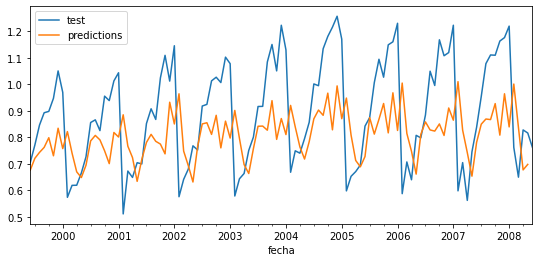

In [31]:
# Backtest 
# ==============================================================================
n_test = 36*3 + 1
data_train = data[:-n_test]
data_test  = data[-n_test:]
data_exog_train = data_exog[:-n_test]
data_exog_test  = data_exog[-n_test:]

forecaster = ForecasterAutoregMultiOutput(
                    regressor = LinearRegression(),
                    steps     = 2,
                    lags      = 3
                )

metrica, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = data,
                            exog       = data_exog,
                            initial_train_size = len(data_train),
                            steps      = forecaster.steps,
                            metric     = 'mean_squared_error'
                       )

print(metrica)

# Se añade el índice temporal a las predicciones
predicciones_backtest = pd.Series(data=predictions, index=data_test[:len(predictions)].index)

# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
#data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predicciones_backtest.plot(ax=ax, label='predictions')
ax.legend();

## Autoregressive + n exogenous predictors
<br>

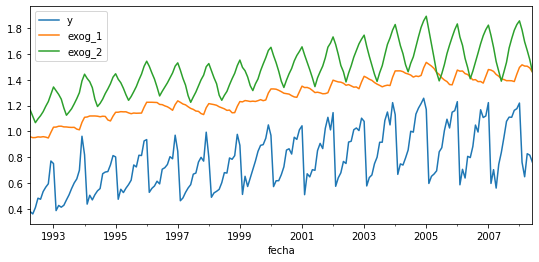

In [72]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv')
data = pd.read_csv(url, sep=',')

# data preprocessing
# ==============================================================================
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y/%m/%d')
data = data.set_index('fecha')
data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data.sort_index()

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data.plot(ax=ax);

# Split train-test
# ==============================================================================
steps = 36
data_train = data.iloc[:-steps, :]
data_test  = data.iloc[-steps:, :]

In [73]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregMultiOutput(
                    regressor = RandomForestRegressor(),
                    steps     = 36,
                    lags      = 10
                )

forecaster.fit(y=data_train['y'], exog=data_train[['exog_1', 'exog_2']])
forecaster

<class 'skforecast.ForecasterAutoregMultiOutput.ForecasterAutoregMultiOutput'> 
Regressor: RandomForestRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Window size: 10 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['exog_1', 'exog_2'] 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> 
Training index frequancy: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 

In [74]:
# Feature importance
# ==============================================================================
for step in range(1, forecaster.steps):
    print(f"\n Model step: {step}")
    print(forecaster.get_feature_importances(step = step))


 Model step: 1
[0.36684395 0.13330928 0.02595331 0.02956639 0.02015906 0.02274679
 0.03247874 0.02362518 0.02760651 0.09535453 0.02029381 0.20206245]

 Model step: 2
[0.04757003 0.03445521 0.02951805 0.02165589 0.02094736 0.02306214
 0.02669598 0.03311067 0.04275489 0.44295264 0.02507634 0.25220079]

 Model step: 3
[0.02811021 0.00269718 0.01088328 0.00523933 0.00474808 0.01234407
 0.01766855 0.04944421 0.0231165  0.76542035 0.00706684 0.0732614 ]

 Model step: 4
[0.00263989 0.01521462 0.00519845 0.00453275 0.01361117 0.01457946
 0.03824922 0.0192628  0.78209039 0.00643277 0.01061925 0.08756925]

 Model step: 5
[0.01704852 0.00483607 0.00564268 0.01283066 0.01838406 0.03647769
 0.0270047  0.777396   0.00557957 0.01858621 0.01198233 0.06423153]

 Model step: 6
[0.0052992  0.00370297 0.01617937 0.0191745  0.03393131 0.02000985
 0.77081851 0.00580471 0.02276827 0.00918359 0.01152902 0.0815987 ]

 Model step: 7
[0.00554138 0.0147294  0.0155502  0.02771007 0.0264407  0.77497422
 0.00521795

Test error (mse): 0.004774209933832708


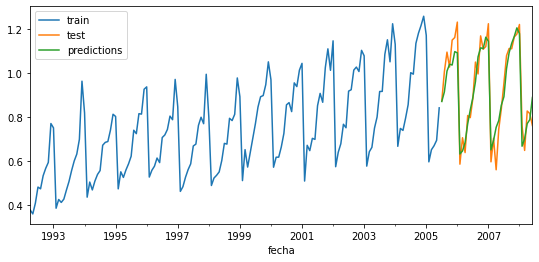

In [75]:
# Predict
# ==============================================================================
predictions = forecaster.predict(exog=data_test[['exog_1', 'exog_2']])


# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [71]:
# Backtest 
# ==============================================================================
n_test = 36*3 + 1
data_train = data.iloc[:-n_test]
data_test  = data.iloc[-n_test:]

forecaster = ForecasterAutoregMultiOutput(
                    regressor = RandomForestRegressor(),
                    steps     = 36,
                    lags      = 10
                )

metrica, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = data['y'],
                            exog       = data[['exog_1', 'exog_2']],
                            initial_train_size = len(data_train),
                            steps      = forecaster.steps,
                            metric     = 'mean_squared_error'
                       )

print(metrica)


# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
#data_train.plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predicciones_backtest.plot(ax=ax, label='predictions')
ax.legend();

Exception: `exog` must have at least as many values as `steps` predicted.

## Información de sesión

In [ ]:
from sinfo import sinfo
sinfo()